# **H-1B VISA APPROVAL PREDICTION**

## TASK 1: Exploratory Data Analysis

###  By- Avani Laad ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("C:/Users/HP/Desktop/.ipynb_checkpoints/H1B/H-1B_Disclosure_Data_FY2019.csv")
dataset.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,13,14,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,57,58,59,61,64,66,67,68,69,70,71,72,73,76,78,79,80,82,85,87,88,89,90,91,92,93,94,97,98,99,100,101,103,106,108,109,110,111,112,113,114,115,121,122,124,127,129,130,131,132,133,134,135,136,142,143,145,148,150,151,152,153,154,155,156,157,160,162,163,164,166,169,171,172,173,174,175,176,177,178,184,185,187,190,192,193,194,195,196,197,198,199,205,206,208,211,213,214,215,216,217,218,219,220,223,225,226,227,229,232,234,235,236,237,238,239,240,244,246,247,248,250,253,254,255,256,257,258,259) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,08-04-2016,30-04-2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,14-07-2017,13-05-2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,23-08-2017,30-04-2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,22-12-2017,20-08-2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,10-01-2018,15-04-2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.shape

(1048547, 260)

In [4]:
#calculating sum of null values
dataset.isnull().sum()

CASE_NUMBER            383931
CASE_STATUS            383931
CASE_SUBMITTED         383931
DECISION_DATE          383931
ORIGINAL_CERT_DATE    1001601
                       ...   
WILLFUL_VIOLATOR       399010
SUPPORT_H1B            810248
STATUTORY_BASIS        840557
MASTERS_EXEMPTION     1047254
PUBLIC_DISCLOSURE      417188
Length: 260, dtype: int64

In [5]:
#dropping columns with more than 90% null values
perc = 90
min_count =  int(((100-perc)/100)*dataset.shape[0] + 1)
dataset = dataset.dropna( axis=1, thresh=min_count)

In [6]:
dataset.shape

(1048547, 59)

In [7]:
#dropping duplicate values
dataset.drop_duplicates(inplace=True)
dataset.shape

(664617, 59)

In [8]:
dataset.isnull().sum()

CASE_NUMBER                                   1
CASE_STATUS                                   1
CASE_SUBMITTED                                1
DECISION_DATE                                 1
VISA_CLASS                                    1
JOB_TITLE                                     2
SOC_CODE                                      5
SOC_TITLE                                     5
FULL_TIME_POSITION                            1
PERIOD_OF_EMPLOYMENT_START_DATE               1
PERIOD_OF_EMPLOYMENT_END_DATE                 1
TOTAL_WORKER_POSITIONS                        3
NEW_EMPLOYMENT                                1
CONTINUED_EMPLOYMENT                          1
CHANGE_PREVIOUS_EMPLOYMENT                    1
NEW_CONCURRENT_EMPLOYMENT                     2
CHANGE_EMPLOYER                               1
AMENDED_PETITION                              1
EMPLOYER_NAME                                11
EMPLOYER_ADDRESS1                             4
EMPLOYER_ADDRESS2                       

In [9]:
#filling null values of CASE_STATUS with 'certified' i.e with mode
dataset.CASE_STATUS=dataset.CASE_STATUS.fillna("CERTIFIED")

In [10]:
#calculating correlation
dataset.corr()

,TOTAL_WORKER_POSITIONS,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,NAICS_CODE,WORKSITE_WORKERS_1,PREVAILING_WAGE_1,PW_NON-OES_YEAR_1
TOTAL_WORKER_POSITIONS,1.000000,0.501824,0.374866,0.570497,0.597364,-0.102237,0.008019,0.041159,-0.000206
CHANGE_PREVIOUS_EMPLOYMENT,0.501824,1.000000,0.298125,0.409356,0.512133,-0.029182,0.003372,0.035356,-0.000163
NEW_CONCURRENT_EMPLOYMENT,0.374866,0.298125,1.000000,0.235185,0.292767,-0.037142,0.001543,-0.046454,-0.000095
CHANGE_EMPLOYER,0.570497,0.409356,0.235185,1.000000,0.520233,-0.093679,0.003963,0.094315,0.000913
AMENDED_PETITION,0.597364,0.512133,0.292767,0.520233,1.000000,-0.112970,0.003977,0.046553,-0.000375
NAICS_CODE,-0.102237,-0.029182,-0.037142,-0.093679,-0.112970,1.000000,-0.000622,-0.032541,-0.002810
WORKSITE_WORKERS_1,0.008019,0.003372,0.001543,0.003963,0.003977,-0.000622,1.000000,-0.000478,-0.000012
PREVAILING_WAGE_1,0.041159,0.035356,-0.046454,0.094315,0.046553,-0.032541,-0.000478,1.000000,0.000135
PW_NON-OES_YEAR_1,-0.000206,-0.000163,-0.000095,0.000913,-0.000375,-0.002810,-0.000012,0.000135,1.000000


<AxesSubplot:>

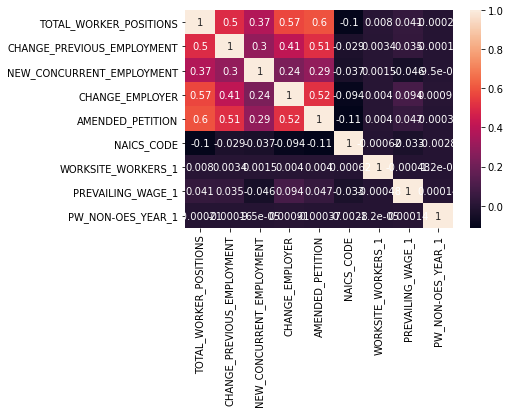

In [11]:
corr=dataset.corr()
sns.heatmap(corr, annot=True)

In [12]:
#printing all columns of dataset
print(dataset.columns.values)

['CASE_NUMBER' 'CASE_STATUS' 'CASE_SUBMITTED' 'DECISION_DATE' 'VISA_CLASS'
 'JOB_TITLE' 'SOC_CODE' 'SOC_TITLE' 'FULL_TIME_POSITION'
 'PERIOD_OF_EMPLOYMENT_START_DATE' 'PERIOD_OF_EMPLOYMENT_END_DATE'
 'TOTAL_WORKER_POSITIONS' 'NEW_EMPLOYMENT' 'CONTINUED_EMPLOYMENT'
 'CHANGE_PREVIOUS_EMPLOYMENT' 'NEW_CONCURRENT_EMPLOYMENT'
 'CHANGE_EMPLOYER' 'AMENDED_PETITION' 'EMPLOYER_NAME' 'EMPLOYER_ADDRESS1'
 'EMPLOYER_ADDRESS2' 'EMPLOYER_CITY' 'EMPLOYER_STATE'
 'EMPLOYER_POSTAL_CODE' 'EMPLOYER_COUNTRY' 'EMPLOYER_PHONE' 'NAICS_CODE'
 'AGENT_REPRESENTING_EMPLOYER' 'AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME'
 'AGENT_ATTORNEY_ADDRESS1' 'AGENT_ATTORNEY_ADDRESS2' 'AGENT_ATTORNEY_CITY'
 'AGENT_ATTORNEY_STATE' 'AGENT_ATTORNEY_POSTAL_CODE'
 'AGENT_ATTORNEY_COUNTRY' 'AGENT_ATTORNEY_PHONE' 'STATE_OF_HIGHEST_COURT'
 'NAME_OF_HIGHEST_STATE_COURT' 'WORKSITE_WORKERS_1' 'SECONDARY_ENTITY_1'
 'SECONDARY_ENTITY_BUSINESS_NAME_1' 'WORKSITE_ADDRESS1_1'
 'WORKSITE_ADDRESS2_1' 'WORKSITE_CITY_1' 'WORKSITE_COUNTY_1'
 'WORKSITE_

### Extracting important columns from this dataset

In [13]:
#creating a new dataframe with 20 important features
new=pd.DataFrame(dataset, columns=['CASE_STATUS','JOB_TITLE','SOC_CODE','SOC_TITLE','VISA_CLASS','EMPLOYER_NAME','SECONDARY_ENTITY_1','AGENT_REPRESENTING_EMPLOYER','NAICS_CODE','CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT','CHANGE_EMPLOYER','AMENDED_PETITION','H-1B_DEPENDENT','SUPPORT_H1B','WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1','WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS'])
new

,CASE_STATUS,JOB_TITLE,SOC_CODE,SOC_TITLE,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
0,WITHDRAWN,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,H-1B,"R/GA MEDIA GROUP, INC.",NaN,NaN,541810.0,1,0.0,0.0,0.0,0.0,N,NaN,N,"$1,79,000.00",Year,1.0
1,WITHDRAWN,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,E-3 Australian,MOTHER INDUSTRIES LLC,NaN,NaN,541810.0,1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,"$1,10,000.00",Year,1.0
2,WITHDRAWN,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,E-3 Australian,"WE ARE UNLIMITED, INC.",NaN,NaN,541810.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,"$2,75,000.00",Year,1.0
3,WITHDRAWN,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,E-3 Australian,"HELLO ELEPHANT, LLC",NaN,NaN,541810.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,"$1,40,000.00",Year,1.0
4,WITHDRAWN,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,E-3 Australian,"HELLO ELEPHANT, LLC",NaN,NaN,541810.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,"$1,80,000.00",Year,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664612,DENIED,APPLICATIONS CONSULTANT 2,NaN,NaN,H-1B,CAPGEMINI AMERICA INC,Y,N,5416.0,0.0,0.0,0.0,0.0,0.0,Y,Y,N,80800,Year,1.0
664613,DENIED,BUSINESS SYSTEMS ANALYST 2,NaN,NaN,H-1B,CAPGEMINI AMERICA INC,Y,N,5416.0,0.0,0.0,0.0,0.0,0.0,Y,Y,N,74500,Year,1.0
664614,DENIED,APPLICATIONS CONSULTANT 2,NaN,NaN,H-1B,CAPGEMINI AMERICA INC,Y,N,5416.0,0.0,0.0,0.0,0.0,0.0,Y,Y,N,75900,Year,1.0
664615,DENIED,BUSINESS SYSTEMS ANALYST 2,NaN,NaN,H-1B,CAPGEMINI AMERICA INC,Y,NaN,5416.0,1.0,0.0,0.0,0.0,0.0,Y,Y,N,66700,Year,1.0


In [14]:
new.shape

(664617, 20)

In [15]:
new=new.dropna(axis=0)
new.shape

(209498, 20)

In [16]:
new.to_csv("H-1B_Disclosure_Data_FY2019_new.csv")

In [17]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209498 entries, 79 to 664578
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  209498 non-null  object 
 1   JOB_TITLE                    209498 non-null  object 
 2   SOC_CODE                     209498 non-null  object 
 3   SOC_TITLE                    209498 non-null  object 
 4   VISA_CLASS                   209498 non-null  object 
 5   EMPLOYER_NAME                209498 non-null  object 
 6   SECONDARY_ENTITY_1           209498 non-null  object 
 7   AGENT_REPRESENTING_EMPLOYER  209498 non-null  object 
 8   NAICS_CODE                   209498 non-null  float64
 9   CONTINUED_EMPLOYMENT         209498 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   209498 non-null  float64
 11  NEW_CONCURRENT_EMPLOYMENT    209498 non-null  float64
 12  CHANGE_EMPLOYER              209498 non-null  float64
 13

In [18]:
new.isnull().sum()

CASE_STATUS                    0
JOB_TITLE                      0
SOC_CODE                       0
SOC_TITLE                      0
VISA_CLASS                     0
EMPLOYER_NAME                  0
SECONDARY_ENTITY_1             0
AGENT_REPRESENTING_EMPLOYER    0
NAICS_CODE                     0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
H-1B_DEPENDENT                 0
SUPPORT_H1B                    0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
dtype: int64

In [19]:
new.describe()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,TOTAL_WORKER_POSITIONS
count,209498.000000,209498.000000,209498.000000,209498.000000,209498.000000,209498.000000
mean,499716.036549,0.139199,0.006797,0.164121,0.228341,1.380113
std,139583.663135,1.314363,0.082512,0.827707,0.837031,3.642801
min,1111.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,541511.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,541511.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,541511.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,925120.000000,338.000000,3.000000,30.000000,30.000000,500.000000


### Performing analysis on particular columns ###

In [20]:
new['CASE_STATUS'].value_counts()

CERTIFIED              197881
CERTIFIED-WITHDRAWN      5720
WITHDRAWN                5195
DENIED                    702
Name: CASE_STATUS, dtype: int64

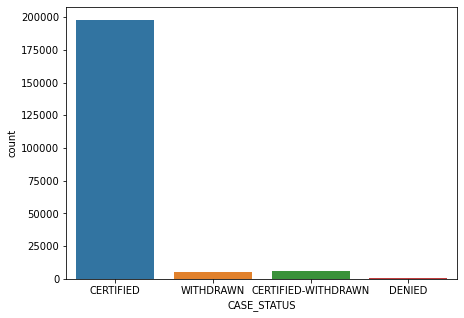

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x ='CASE_STATUS', data = new)
plt.show()

### 93% of applications got certified ###

In [22]:
#displaying top 5 job title
jobTitle=new['JOB_TITLE'].value_counts().head(5)
jobTitle

SOFTWARE DEVELOPER                     19929
SOFTWARE ENGINEER                      13330
SENIOR SYSTEMS ANALYST JC60            11482
TECHNOLOGY LEAD - US - PRACTITIONER     7245
MANAGER JC50                            7105
Name: JOB_TITLE, dtype: int64

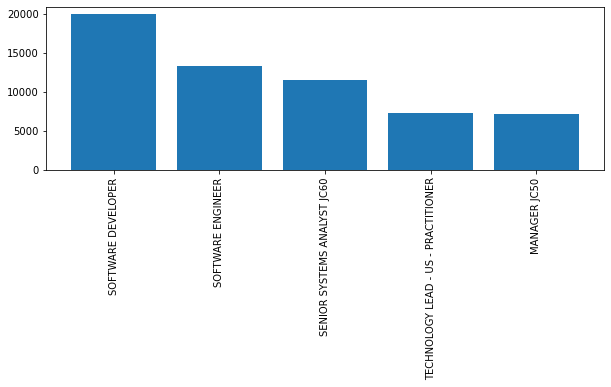

In [23]:
position=('SOFTWARE DEVELOPER','SOFTWARE ENGINEER','SENIOR SYSTEMS ANALYST JC60','TECHNOLOGY LEAD - US - PRACTITIONER','MANAGER JC50')

plt.figure(figsize=(10,3))
plt.bar(position, jobTitle)
plt.xticks(rotation=90)
plt.show()

### Software developer is most desired position 

In [24]:
socTitle=new['SOC_TITLE'].value_counts().head(5) #top 5 soc title
socTitle

SOFTWARE DEVELOPERS, APPLICATIONS    81826
COMPUTER SYSTEMS ANALYST             36744
COMPUTER OCCUPATIONS, ALL OTHER      26207
COMPUTER SYSTEMS ANALYSTS            12356
COMPUTER PROGRAMMERS                 10187
Name: SOC_TITLE, dtype: int64

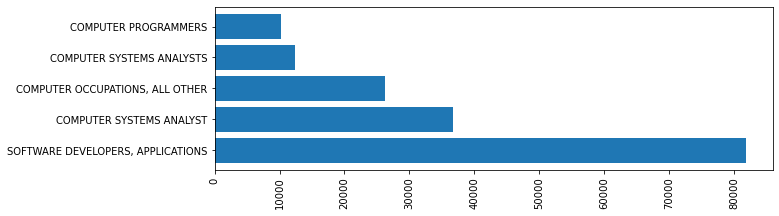

In [25]:
title=('SOFTWARE DEVELOPERS, APPLICATIONS','COMPUTER SYSTEMS ANALYST','COMPUTER OCCUPATIONS, ALL OTHER','COMPUTER SYSTEMS ANALYSTS','COMPUTER PROGRAMMERS')
plt.figure(figsize=(10,3))
#plt.bar(title, socTitle)
plt.barh(title,socTitle)
plt.xticks(rotation=90)
plt.show()

In [26]:
#since we need to predict only H-1B, therefore we'll delete rows with other visa applications
new['VISA_CLASS'].value_counts()

H-1B               209460
H-1B1 Chile            21
E-3 Australian         14
H-1B1 Singapore         3
Name: VISA_CLASS, dtype: int64

In [27]:
new=new[(new.VISA_CLASS == 'H-1B')] 

In [28]:
new['VISA_CLASS'].value_counts()

H-1B    209460
Name: VISA_CLASS, dtype: int64

In [29]:
new['EMPLOYER_NAME'].value_counts().head(10)
#top 10 employer names

COGNIZANT TECHNOLOGY SOLUTIONS US CORP    25011
INFOSYS LIMITED                           20305
TATA CONSULTANCY SERVICES LIMITED         10543
CAPGEMINI AMERICA INC                      7349
HCL AMERICA, INC.                          4412
WIPRO LIMITED                              3955
LARSEN & TOUBRO INFOTECH LIMITED           3338
TECH MAHINDRA (AMERICAS),INC.              2708
FACEBOOK, INC.                             2044
L&T TECHNOLOGY SERVICES LIMITED            1833
Name: EMPLOYER_NAME, dtype: int64

<AxesSubplot:xlabel='EMPLOYER_NAME'>

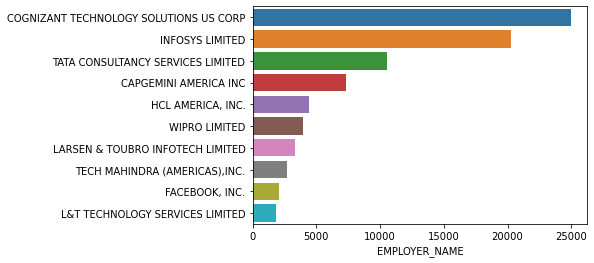

In [30]:
EmpName=new['EMPLOYER_NAME'].value_counts().head(10)
sns.barplot(x= EmpName, y = EmpName.index)

In [31]:
new['CONTINUED_EMPLOYMENT'].value_counts()

0     155796
1      50220
0       1722
1       1009
5        315
2        136
3        130
10        90
4         13
6         12
5          8
B          3
20         2
25         2
15         1
2          1
Name: CONTINUED_EMPLOYMENT, dtype: int64

In [32]:
new['WILLFUL_VIOLATOR'].value_counts()

N    209205
Y       255
Name: WILLFUL_VIOLATOR, dtype: int64

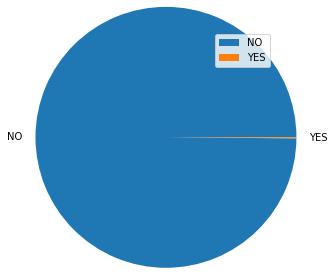

In [33]:
y=new['WILLFUL_VIOLATOR'].value_counts()
label = ["NO", "YES"]
plt.pie(y, radius=1.5, center=(1, 1), frame=False, labels = label)
plt.legend()
plt.show()

In [34]:
new['SECONDARY_ENTITY_1'].value_counts()

Y    168793
N     40667
Name: SECONDARY_ENTITY_1, dtype: int64

In [35]:
new['TOTAL_WORKER_POSITIONS'].value_counts()

1.0      199966
2.0        1900
5.0        1872
6.0        1463
3.0        1275
4.0         790
50.0        565
10.0        542
25.0        268
20.0        249
15.0        175
30.0         80
8.0          76
7.0          64
100.0        59
9.0          28
12.0         17
11.0         14
16.0         13
13.0          9
40.0          8
14.0          5
18.0          4
35.0          3
45.0          3
19.0          3
17.0          3
90.0          2
500.0         1
23.0          1
99.0          1
300.0         1
Name: TOTAL_WORKER_POSITIONS, dtype: int64

In [36]:
new['WAGE_RATE_OF_PAY_FROM_1'].value_counts()

90000.0      3100
100000.0     3037
85000.0      2825
110000.0     2463
95000.0      2301
             ... 
123305.04       1
41.45           1
79575.0         1
79578.0         1
62800           1
Name: WAGE_RATE_OF_PAY_FROM_1, Length: 17725, dtype: int64